In [14]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
AUTO = tf.data.experimental.AUTOTUNE

In [ ]:
basic = Sequential([
                    Dense(units = 1 , input_shape = [1])
])
basic.compile(optimizer = tf.keras.optimizers.Adam(0.01),loss = tf.keras.losses.mean_squared_error)

x = tf.constant([-1.0, 0.0, 1.0,2.0, 3.0 ,4.0] ,dtype = tf.float32)
y = tf.constant([-3.0, -1.0 , 1.0 , 3.0 , 5.0 , 7.0],dtype= tf.float32)

basic.fit(x,y ,epochs = 1050,verbose = False)

print(basic.predict([10.0])) # 2x -1 


[[18.999998]]


In [ ]:
## What neural network learn

FirstLayer = Dense(units = 1 , input_shape = [1])

basic = Sequential([FirstLayer])
basic.compile(loss = tf.keras.losses.mean_squared_error,
              optimizer = tf.keras.optimizers.Adam(0.01))

x = tf.constant([-1.0, 0.0, 1.0,2.0, 3.0 ,4.0] ,dtype = tf.float32)
y = tf.constant([-3.0, -1.0 , 1.0 , 3.0 , 5.0 , 7.0],dtype= tf.float32)

basic.fit(x,y ,epochs = 1050,verbose = False)

print("The Weights {}".format(FirstLayer.get_weights()))


The Weights [array([[1.9044334]], dtype=float32), array([-0.77882606], dtype=float32)]


In [ ]:
data = tf.keras.datasets.fashion_mnist

(training_imgs, training_labels), (test_imgs, test_labels) = data.load_data()

print(training_imgs[:2])
training_imgs = training_imgs / 255.0
test_imgs = test_imgs / 255.0

training_imgs = tf.convert_to_tensor(training_imgs,dtype = tf.float64)
test_imgs = tf.convert_to_tensor(test_imgs,dtype= tf.float64)

4423680/4422102 [==============================] - 0s 0us/step
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
from tensorflow.keras.utils import to_categorical
training_labels, test_labels = to_categorical(training_labels,10) , to_categorical(test_labels, 10)

In [ ]:
training_imgs, test_imgs = tf.convert_to_tensor(training_imgs) , tf.convert_to_tensor(test_imgs)
TrainDataset , TestDataset = (tf.data.Dataset.from_tensor_slices((training_imgs,training_labels)).
                              batch(32).prefetch(AUTO)), tf.data.Dataset.from_tensor_slices((test_imgs,test_labels))
TrainDataset.element_spec

(TensorSpec(shape=(None, 28, 28), dtype=tf.float64, name=None),
 TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))

In [ ]:
# Using sequential 
modelSeq = Sequential([
                       tf.keras.layers.Flatten(input_shape=[28, 28]),
                       tf.keras.layers.Dense(units = 256, activation = tf.nn.relu),
                       tf.keras.layers.Dense(units = 128,activation = tf.nn.leaky_relu),
                       tf.keras.layers.Dropout(0.2),
                       tf.keras.layers.Dense(10, activation = tf.nn.softmax)
                       
                       ])

# Using Functional Api
from tensorflow.keras import Model

inputlayer = tf.keras.layers.Input(shape=(28, 28))
layer = tf.keras.layers.Flatten()(inputlayer)
layer = tf.keras.layers.Dense(units = 256, activation = tf.nn.relu)(layer)
layer = tf.keras.layers.Dense(units = 128, activation = tf.nn.leaky_relu)(layer)
layer = tf.keras.layers.Dropout(0.2)(layer)
layer = tf.keras.layers.Dense(units = 10, activation= tf.nn.softmax)(layer)


modelFunc = Model(inputs=[inputlayer], outputs = layer)


METRICS =[
          tf.keras.metrics.TrueNegatives(name="TN"),
          tf.keras.metrics.FalseNegatives(name= "FN"),
          tf.keras.metrics.TruePositives(name="TP"),
          tf.keras.metrics.FalsePositives(name="FP"),
          tf.keras.metrics.CategoricalAccuracy(name="acc")
]

modelSeq.compile(metrics=METRICS, optimizer= tf.keras.optimizers.Adam(0.01),
                 loss = tf.keras.losses.CategoricalCrossentropy())

modelFunc.compile(metrics=METRICS, optimizer= tf.keras.optimizers.Adam(0.01),
                 loss = tf.keras.losses.CategoricalCrossentropy())




In [ ]:
modelSeq.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class ModelGan(tf.keras.Model):
  def __init__(self , **kwargs):
    super(ModelGan,self).__init__(**kwargs)
    self.FlattenInput = tf.keras.layers.Flatten(input_shape = (28,28),name="firstLayer")
    self.Dense1 = tf.keras.layers.Dense(units = 64, activation=tf.nn.relu,name="secondLayer")
    self.Dense2 = tf.keras.layers.Dense(units = 16,activation = tf.nn.leaky_relu,name="ThirdLayer")
    self.Dropout = tf.keras.layers.Dropout(0.4)
    self.DenseOutput = tf.keras.layers.Dense(units = 10,activation=tf.nn.softmax)
  


  def call(self, inputs , training=False):
    modelRiweh = self.FlattenInput(inputs)
    modelRiweh = self.Dense1(modelRiweh)
    modelRiweh = self.Dense2(modelRiweh)
    modelRiweh = self.Dropout(modelRiweh)
    modelRiweh = self.DenseOutput(modelRiweh)

    return modelRiweh

YoooGan = ModelGan()
YoooGan.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ["acc"])
YoooGan(training_imgs)
YoooGan.summary()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Model: "model_gan"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
firstLayer (Flatten)         multiple                  0         
_________________________________________________________________
secondLayer (Dense)          multiple                  50240     
_________________________________________________________________
ThirdLayer (Dense)           multiple                  1040      
___________________________

In [19]:
class OwnCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch ,logs={}):
    if(logs.get("acc")> 0.86):
      print("\nReached 86% accuracy , stopping Training")
      self.model.stop_training = True
    
mine = OwnCallback()

In [20]:
YoooGan.fit(TrainDataset,epochs=100,verbose=0,callbacks=[mine])


Reached 86% accuracy , stopping Training


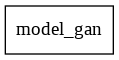

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(YoooGan, show_shapes=True)

In [32]:
class AnotherOwnCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch ,logs={}):
    print("\n",logs.keys())
    if(logs.get("FP")> 1000.0000):
      print("\nReached 1000 False Positives , stopping Training")
      self.model.stop_training = True
    
Another = AnotherOwnCallback()

In [33]:
modelFunc.fit(TrainDataset,epochs=5,verbose=1,callbacks = [Another])


Epoch 1/5
1870/1875 [============================>.] - ETA: 0s - loss: 0.4491 - TN: 533107.0000 - FN: 11563.0000 - TP: 48277.0000 - FP: 5453.0000 - acc: 0.8501
 dict_keys(['loss', 'TN', 'FN', 'TP', 'FP', 'acc'])

Reached 1000 False Positives , stopping Training
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4492 - TN: 534537.0000 - FN: 11612.0000 - TP: 48388.0000 - FP: 5463.0000 - acc: 0.8500


In [ ]:
modelSeq.fit(TrainDataset,epochs=5,verbose=False)


print("Udah yang FunctionalAPi")
modelFunc.fit(TrainDataset,epochs=5,verbose=False)


Udah yang FunctionalAPi


In [ ]:
modelSeq.evaluate(test_imgs,test_labels)

modelFunc.evaluate(test_imgs,test_labels)

YoooGan.evaluate(test_imgs,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4698 - acc: 0.8374


[0.469846248626709, 0.8374000191688538]